In [101]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [102]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("gun_deaths.csv")
df['police'] = df['police'].astype('int')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int32  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 6.5+ MB


,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


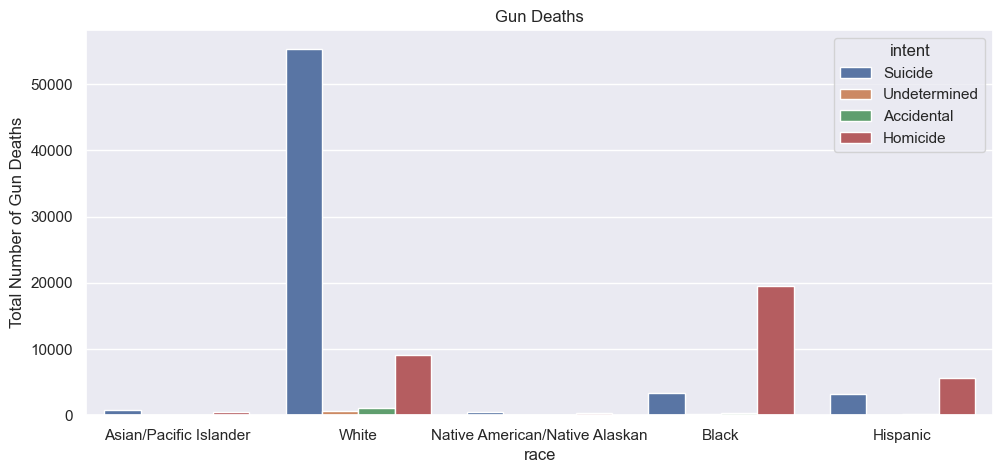

In [104]:
sns.set(rc={'figure.figsize':(11.7,5)})
_ = sns.countplot(data=df,x='race',hue='intent')
_.set_title('Gun Deaths')
_.set(ylabel='Total Number of Gun Deaths')
plt.show()

In [105]:
grupo = ["0-19","20-39","40-59","60-79","80-100"]
bins = np.linspace(df['age'].min(),df['age'].max(),6)
df['age_count'] = pd.cut(df['age'],bins,labels = grupo,include_lowest = True)

Text(0.5, 1.0, 'Dies by Age for all Data')

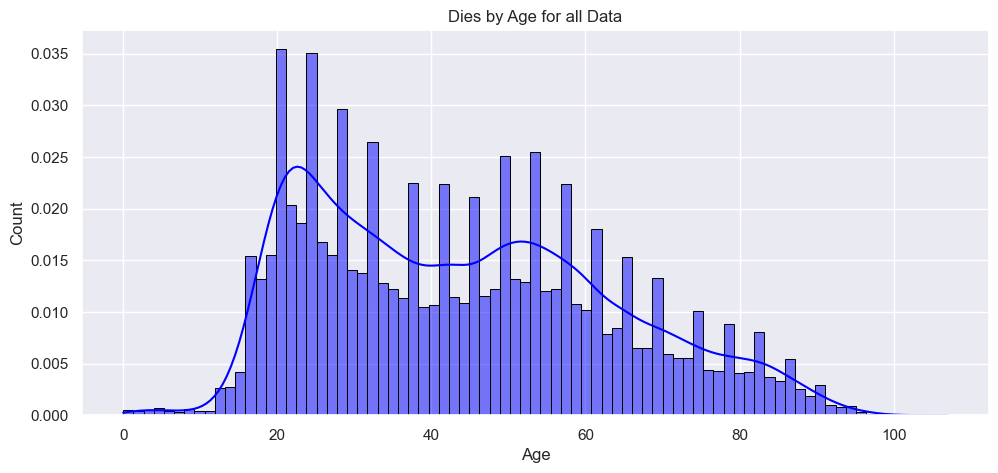

In [135]:
ax = sns.histplot(df['age'], kde=True, color='blue', edgecolor='black', stat='density')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Dies by Age for all Data')

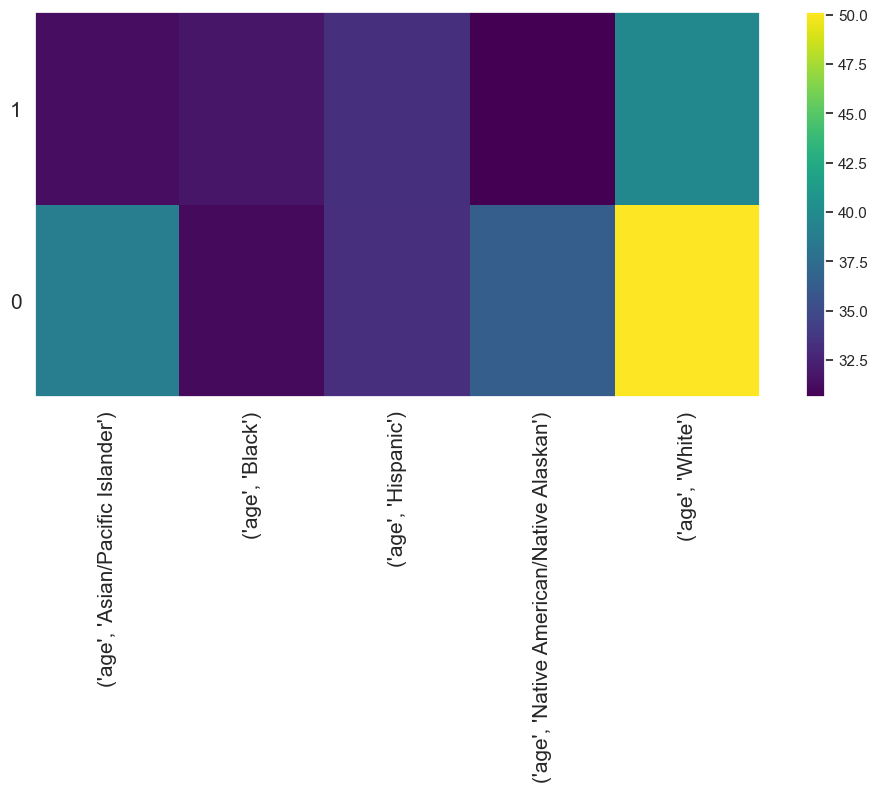

age                        \
race   Asian/Pacific Islander      Black   Hispanic   
police                                                
0                   38.787809  31.087893  33.212381   
1                   31.266667  31.730337  33.340426   

                                                  
race   Native American/Native Alaskan      White  
police                                            
0                           36.391695  50.117149  
1                           30.600000  39.693935

In [107]:
sns.set(rc={'figure.figsize':(11.7,5)})
df_group = df[['age','police','race']].groupby(['police','race'], as_index = False).mean()
dk = df_group.pivot(index = 'police',columns = 'race')
plt.pcolor(dk,cmap = 'viridis')
plt.xticks(np.arange(0.5, len(dk.columns), 1), dk.columns, rotation='vertical', fontsize=15)
plt.yticks(np.arange(0.5, len(dk.index), 1), dk.index, fontsize=15)

plt.colorbar()
plt.show()
dk

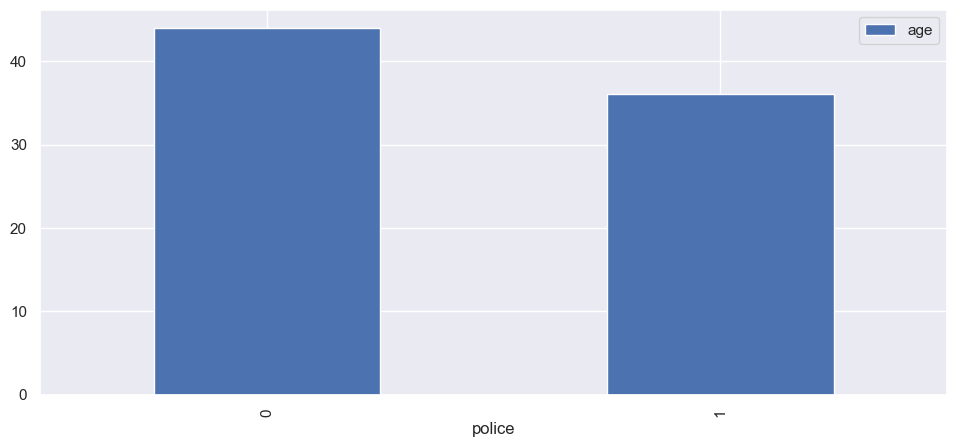

In [108]:
df_group_2 = df[['age','police']].groupby(['police'],as_index=False).mean()
_ = df_group_2.plot(kind = 'bar',x = 'police')

# * For Police not envolved ( = 0 )

Text(0.5, 1.0, 'Dies count by Age')

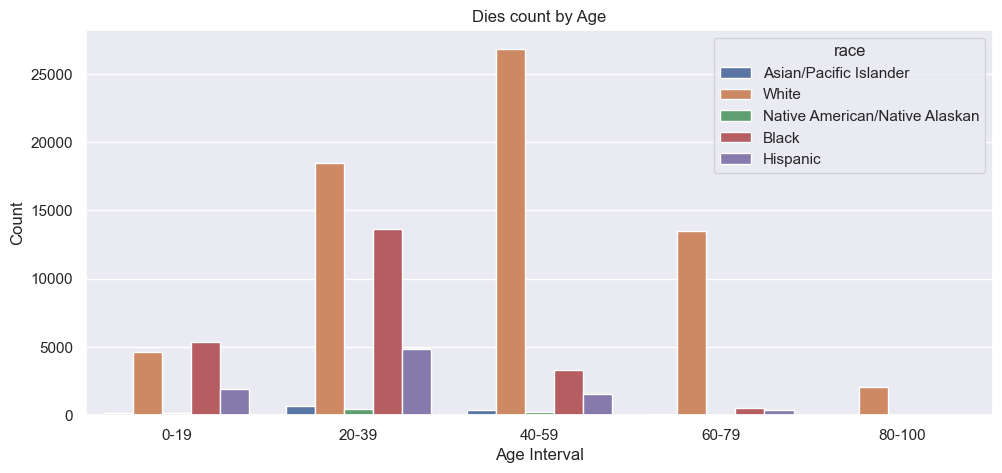

In [109]:
df_police = df[df['police'] == 0]
df_police_graf = sns.countplot(data=df_police, x = 'age_count',hue='race')
##df_police.info()
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Dies count by Age')

Text(0.5, 1.0, 'Dies count by Age by Countinuous distribuition')

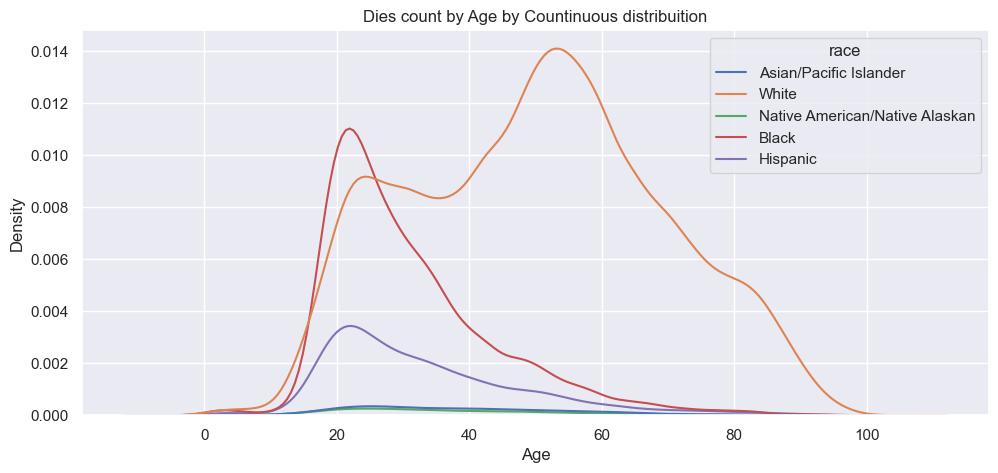

In [110]:
sns.kdeplot(data=df_police, x='age', hue='race', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age by Countinuous distribuition')

Text(0.5, 1.0, 'Line Plot of Age Count by Linear Intervals')

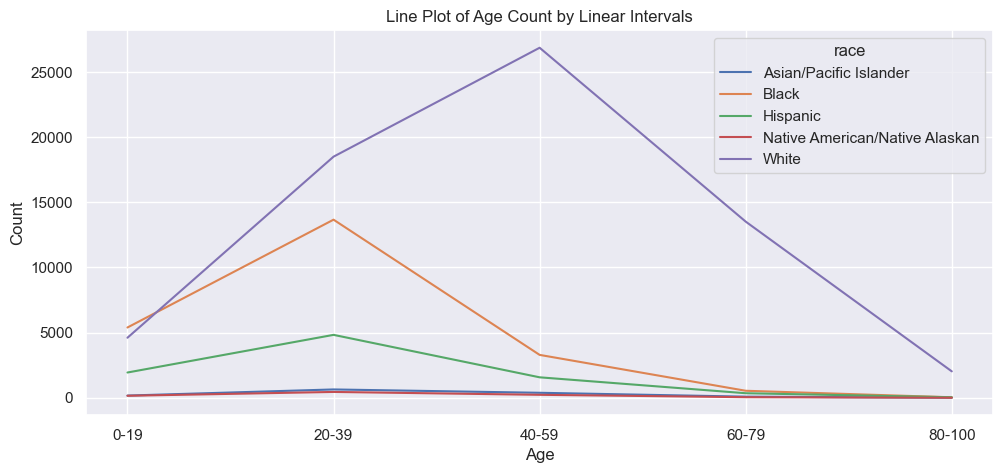

In [111]:
df_counts = df_police.groupby(['age_count', 'race']).size().reset_index(name='count')

lineplot_ = sns.lineplot(data=df_counts, x='age_count', y='count', hue='race')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Line Plot of Age Count by Linear Intervals')

# * For Police envolved ( = 1 )

Text(0.5, 1.0, 'Dies count by Age')

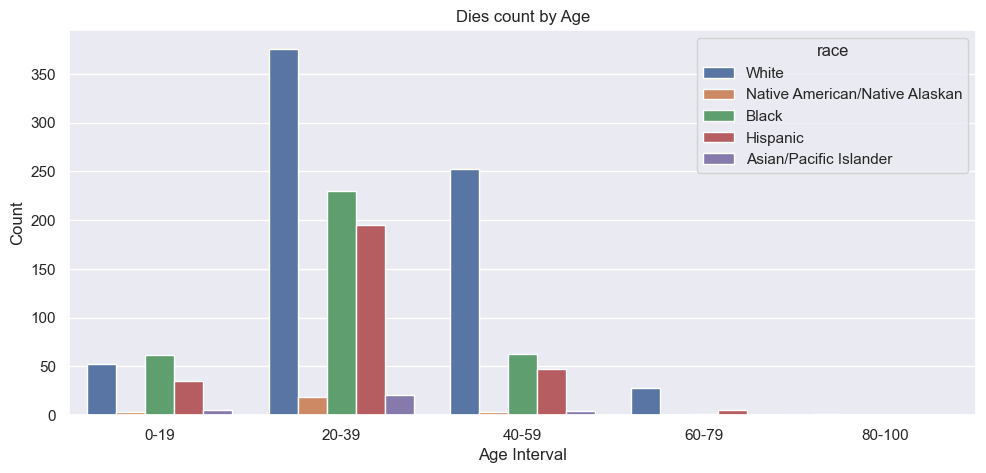

In [112]:
df_police = df[df['police'] == 1]
df_police_graf = sns.countplot(data=df_police, x = 'age_count',hue='race')
##df_police.info()
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Dies count by Age')

Text(0.5, 1.0, 'Dies count by Age by Countinuous distribuition')

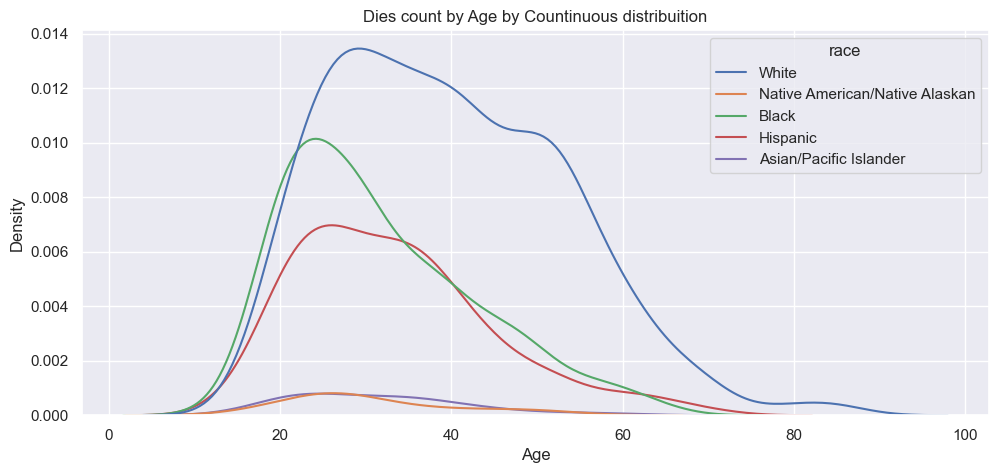

In [113]:
sns.kdeplot(data=df_police, x='age', hue='race', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age by Countinuous distribuition')

Text(0.5, 1.0, 'Line Plot of Age Count by Linear Intervals')

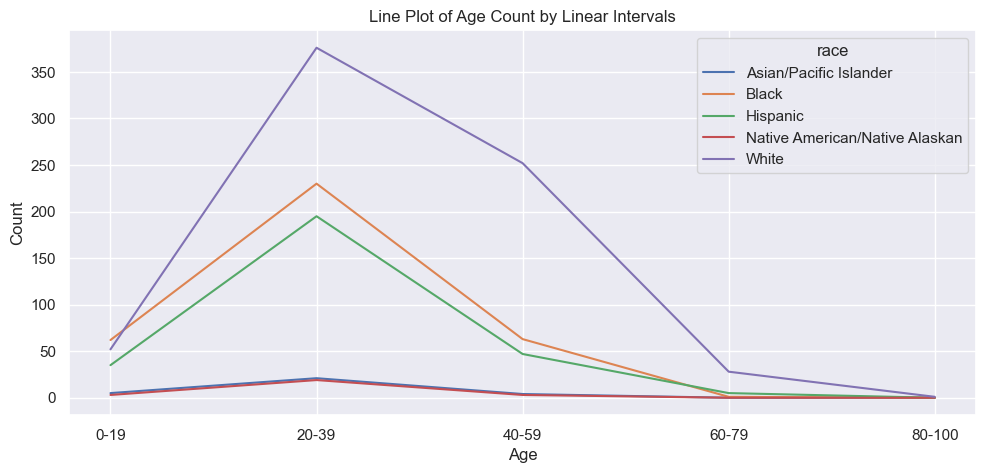

In [114]:
df_counts = df_police.groupby(['age_count', 'race']).size().reset_index(name='count')

lineplot_ = sns.lineplot(data=df_counts, x='age_count', y='count', hue='race')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Line Plot of Age Count by Linear Intervals')

# * Intent Analyzes

# Homicide and suicide by ages with the same process

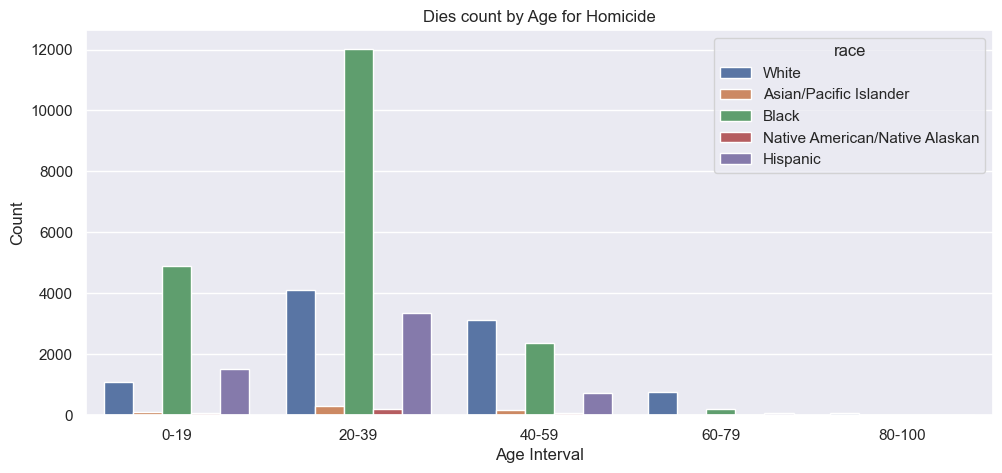

In [115]:
df_homicide = df[df['intent'] == 'Homicide']
#df_homicide_graf = sns.countplot(data=df_homicide, x = '',hue='age_count')
df_homicide_graf = sns.countplot(data=df_homicide, x = 'age_count',hue='race')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Dies count by Age for Homicide')
plt.show()

Text(0.5, 1.0, 'Dies count by Age by Countinuous distribuition for Homicide')

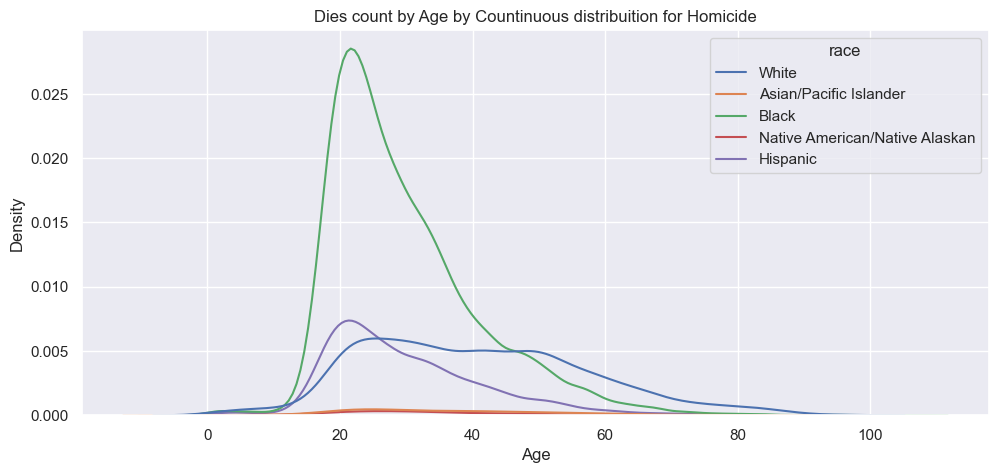

In [116]:
sns.kdeplot(data=df_homicide, x='age', hue='race', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age by Countinuous distribuition for Homicide')

* Most off black people dies by Homicide, lets investigate if it has any correlation with their education once probability those dies can have a intrisic conection with the marginalization, lets see if Education has any correlation with the amount of dies.

# Investigation for Black People and Homicide.

* The case below will investigate only dies by Homicide for Balck people and see if there's any correlation with their education. For this we gotta use but datas where, intent = Homicide and Race = Black, see below:

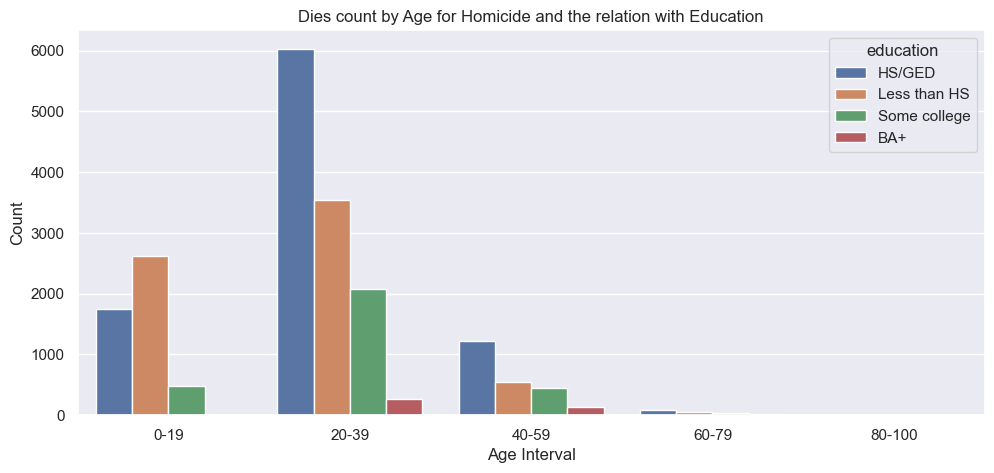

In [117]:
df_homicide_black = df[(df['race'] == 'Black') & (df['intent'] == 'Homicide')]
df_homicide_graf_education_black_people = sns.countplot(data=df_homicide_black, x = 'age_count',hue='education')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Dies count by Age for Homicide and the relation with Education')
plt.show()

Text(0.5, 1.0, 'Dies count by Age for Homicide For Black People and the relation with Education countinouus spectra')

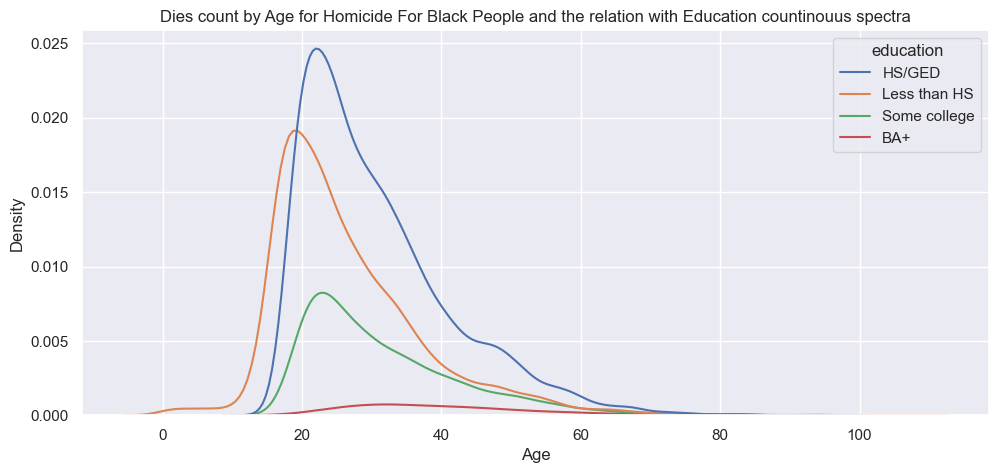

In [122]:
sns.kdeplot(data=df_homicide_black, x='age', hue='education', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age for Homicide For Black People and the relation with Education countinouus spectra')

* We can do a fast conection with a effect in Physics called Ultraviolet catastrophe, it has with a good aproximation the same comportament that we saw in last graph, but instead of education it is temperature, the equation witch explain the fenomena is  $E_{density} = \frac{8\pi h f^3}{c^3}  \frac{1}{e^{\frac{hf}{kT}}-1}$ . In this case T is education, A Categorical Variable Be cient that it's just a comparation that how physics and human comportament are compatible.

* Well, i think we can assume trivial stuffs, black people is allways target of homicide and this is inteisified when we are spaeking abount people which one has no acess to the education. Education by the way, saves lifes.

# Investigation for White People and Suicide.

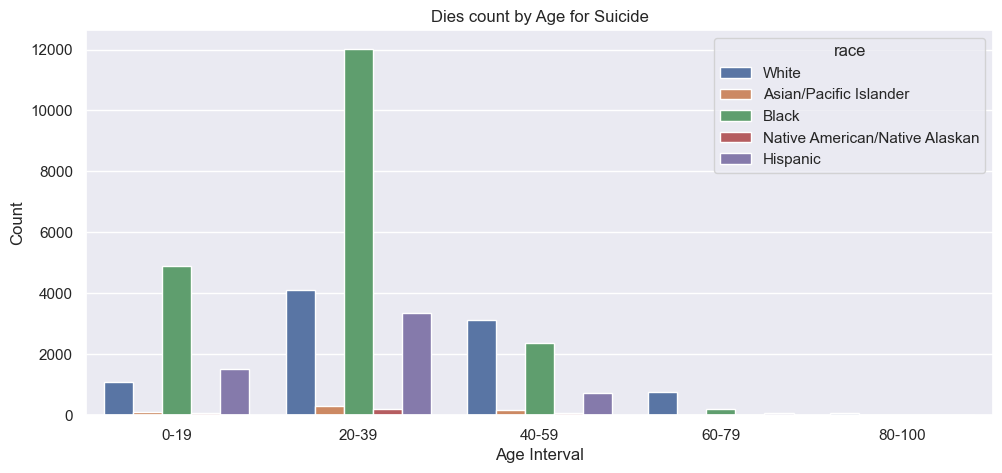

In [119]:
df_suicide = df[df['intent'] == 'Suicide']
#df_homicide_graf = sns.countplot(data=df_homicide, x = '',hue='age_count')
df_suicide_graf = sns.countplot(data=df_homicide, x = 'age_count',hue='race')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Dies count by Age for Suicide')
plt.show()

Text(0.5, 1.0, 'Dies count by Age by Countinuous distribuition for Suicide')

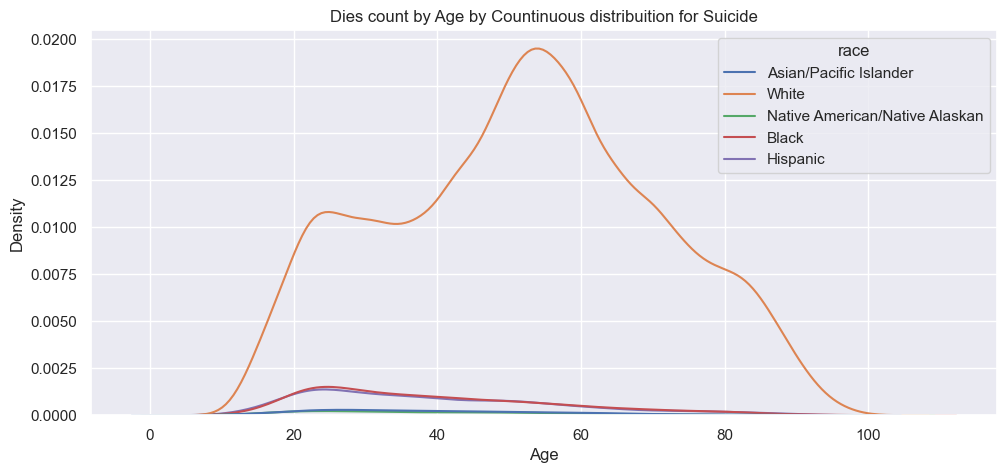

In [120]:
sns.kdeplot(data=df_suicide, x='age', hue='race', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age by Countinuous distribuition for Suicide')

# Does suicide and place have any correlation?

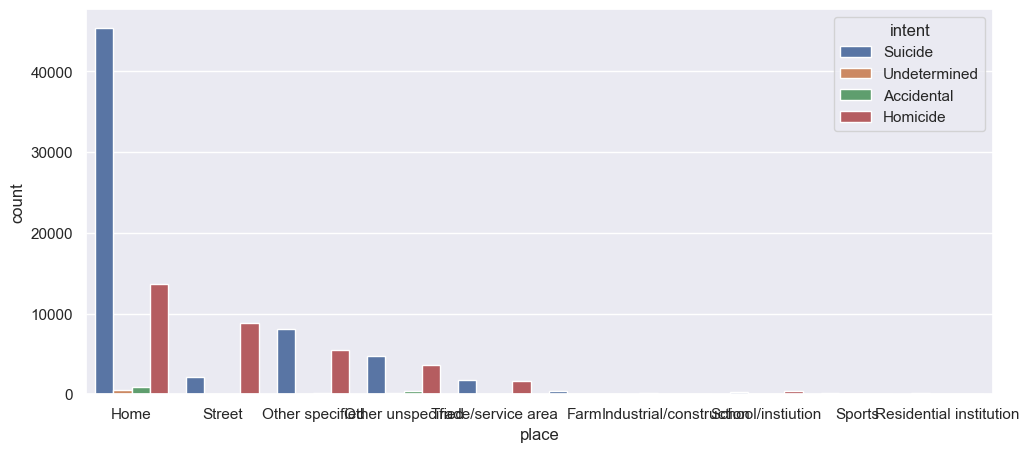

In [125]:
_Yellow = sns.countplot(data=df,x='place',hue='intent')

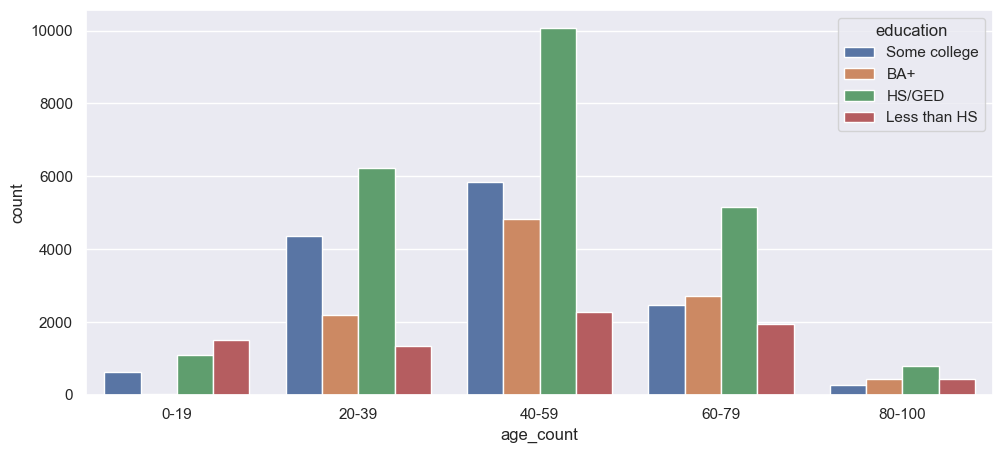

In [127]:
df_suicide_white = df[(df['race'] == 'White') & (df['intent'] == 'Suicide')]
df_suicide_white_graf = sns.countplot(data=df_suicide_white, x = 'age_count',hue='education')

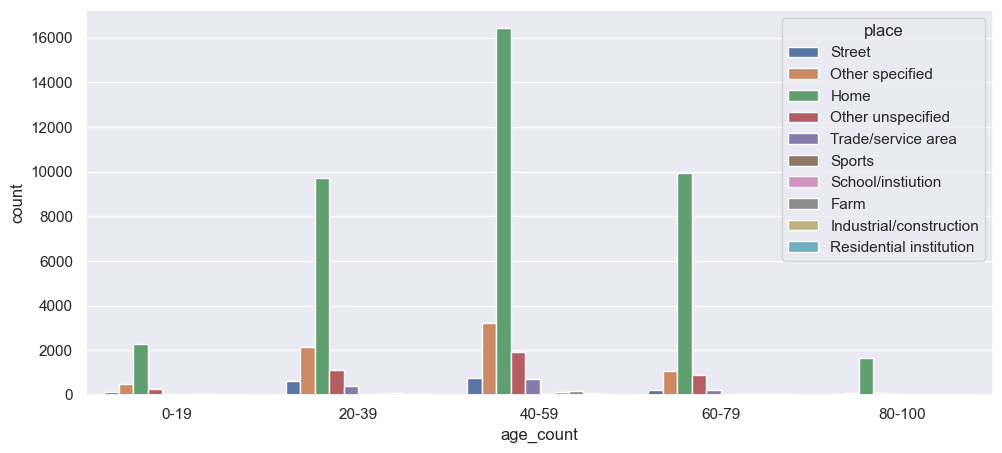

In [129]:
df_suicide_white_graf = sns.countplot(data=df_suicide_white, x = 'age_count',hue='place')

Text(0.5, 1.0, 'Dies count by Age by Countinuous distribuition for Education')

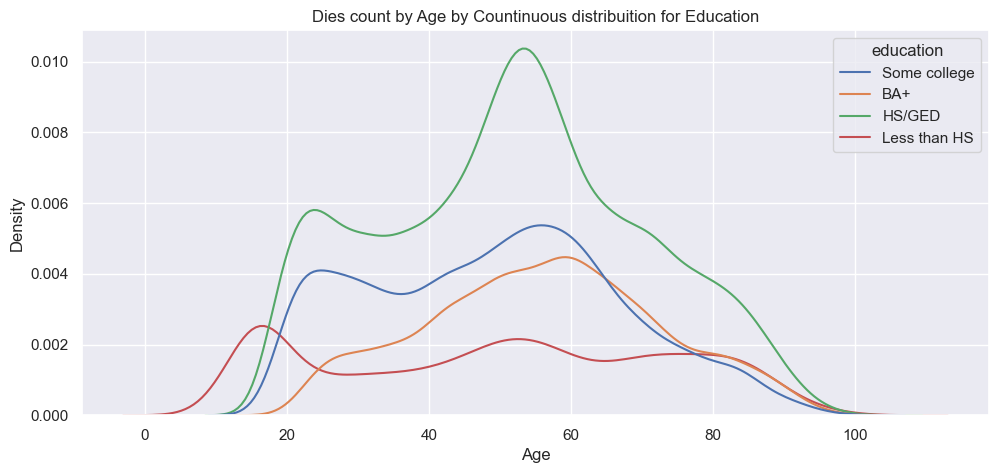

In [134]:
sns.kdeplot(data=df_suicide_white, x='age', hue='education', fill=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Dies count by Age by Countinuous distribuition for Education')

* In the case of suicide for white people education has a proportion but does't so intense like education/Homicide for Black people, for Suicide case sounds that age is the strongest fator as we can see above, at the range in aproach 40-50 there's a high positive inclination and after 50 years old a high declination. For all educations level it happens but with meassures.

* I hope you see that "race" has different problemns to face on, that happens because a lot of question that are surrounding both cases. Well, lets stop here and to the next time lets investigate problemns for imigrants Hispanic to have a precise analyze, cya!